Processing: ./results cnn10 EGBias/1
Processing: ./results cnn10 EGBias/22
Processing: ./results cnn10 EGBias/42
All files processed.
####################CONSISTENCY CHECK###################:  True
acc 10:  [{'dataset': '10', 'type': 'decor', 'val_loss': 0.786490187048912, 'learning_rate': ' 1e-01', 'decor_learning_rate': ' 1e-03', 'val_accuracy': 0.887, 'decay': 1e-09, 'totalLoss': 0.903949120203654}]
loss 10:  [{'dataset': '10', 'type': 'decor', 'val_loss': 0.786490187048912, 'learning_rate': ' 1e-01', 'decor_learning_rate': ' 1e-03', 'val_accuracy': 0.887, 'decay': 1e-09, 'totalLoss': 0.903949120203654}]
total loss 10 [{'dataset': '10', 'type': 'decor', 'val_loss': 0.7934252937634786, 'learning_rate': ' 1e-01', 'decor_learning_rate': ' 1e-06', 'val_accuracy': 0.8853333333333334, 'decay': 1e-07, 'totalLoss': 0.9027452003558477}]
###########################################################################################
cor acc 10:  [{'dataset': '10', 'type': 'cor', 'val_loss': 0.8177

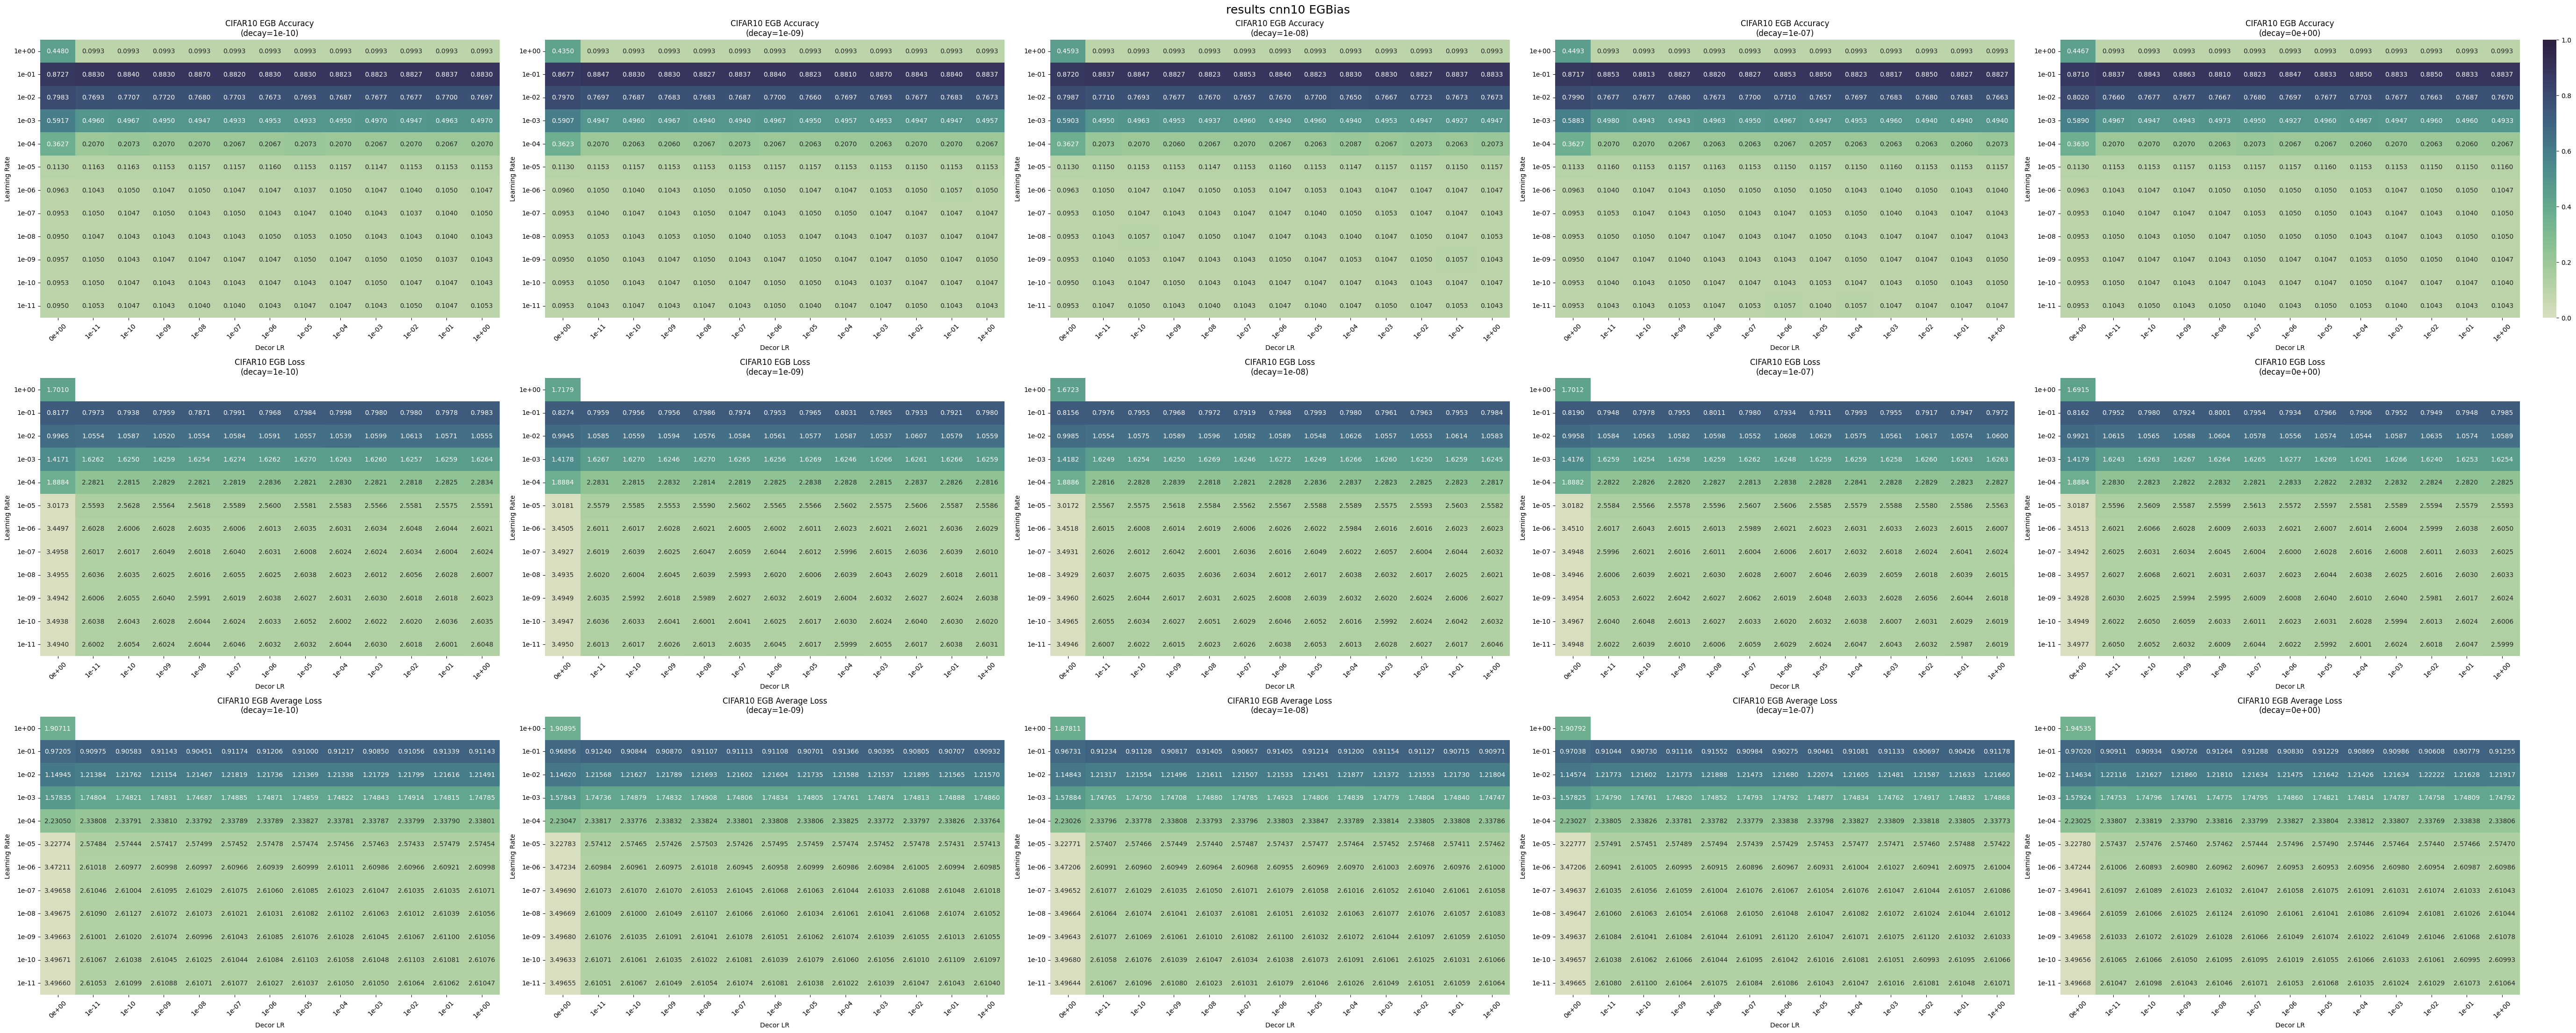

In [9]:
import torch
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import math
import matplotlib.colors as mcolors

# Create output directory
location = "results cnn10 EGBias"
os.makedirs(f"./{location}/Graphs", exist_ok=True)

model_dir = [f"./{location}/1", f"./{location}/22", f"./{location}/42"]
all_figures = []
data1 = []
data22 = []
data42 = []

for dir in model_dir:
    print(f"Processing: {dir}")
    for fname in sorted(os.listdir(dir)):
        
        if fname.endswith(".pt"):
            fpath = os.path.join(dir, fname)

            #print(f"Processing {fname}...")
            d1 = torch.load(fpath, map_location='cpu', weights_only=False)

            stats = d1.get("stats")
            
            # Match: (cor|decor), full_lr, dlr (optional or empty), decay
            match = re.match(r'(decor|cor)-([a-zA-Z]*[\d.eE+\-]+),([\d.eE+\-]+),([\d.eE+\-]+),(\d+)\.pt', fname)

            if not match:
                print(f"Filename format unrecognized: {fname}")
                continue

            type, raw_lr, raw_dlr, raw_decay, idx = match.groups()

            # Separate LR prefix and numeric value
            lr_match = re.match(r'^(\d+)(\d+e[+\-]?\d+)$', raw_lr, re.IGNORECASE)
            if not lr_match:
                print(f"Could not parse LR field: {raw_lr}")
                continue
            prefix, lr_val_str = lr_match.groups()
            lr = float(lr_val_str)

            # Parse DLR (if present and non-empty)
            dlr = float(raw_dlr) if raw_dlr.strip() else None

            # Parse weight decay (always present)
            decay = float(raw_decay)
            totalLoss = 0
            for i in range(len(stats[2])):
                #print(stats[2][i])
                totalLoss+=stats[2][i]

            if(dir == f"./{location}/1"):
                data1.append({"dataset": prefix, "type": type, "val_loss":stats[2][49], "learning_rate": lr, "decor_learning_rate": dlr, "val_accuracy": stats[3][49], "decay": decay, "totalLoss": totalLoss/50})
            elif(dir == f"./{location}/22"):
                data22.append({"dataset": prefix, "type": type, "val_loss":stats[2][49], "learning_rate": lr, "decor_learning_rate": dlr, "val_accuracy": stats[3][49], "decay": decay, "totalLoss": totalLoss/50})
            elif(dir == f"./{location}/42"):
                data42.append({"dataset": prefix, "type": type, "val_loss":stats[2][49], "learning_rate": lr, "decor_learning_rate": dlr, "val_accuracy": stats[3][49], "decay": decay, "totalLoss": totalLoss/50})





print("All files processed.")

# Load into DataFrame
df1 = pd.DataFrame(data1)
df22 = pd.DataFrame(data22)
df42 = pd.DataFrame(data42)

df1.to_excel(f"./{location}/df1.xlsx")
df22.to_excel(f"./{location}/df22.xlsx")
df42.to_excel(f"./{location}/df42.xlsx")

consistent = True
for (_, row1), (_, row2), (_, row3) in zip(df1.iterrows(), df22.iterrows(), df42.iterrows()):
    dataset1 = row1["dataset"]
    dataset22 = row2["dataset"]
    dataset42 = row3["dataset"]
    
    type1 = row1["type"]
    type22 = row2["type"]
    type42 = row3["type"]

    lr1 = row1["learning_rate"]
    lr22 = row2["learning_rate"]
    lr42 = row3["learning_rate"]

    dlr1 = row1["decor_learning_rate"]
    dlr22 = row2["decor_learning_rate"]
    dlr42 = row3["decor_learning_rate"]

    decay1 = row1["decay"]
    decay22 = row2["decay"]
    decay42 = row3["decay"]
    


    if(not((dataset1 == dataset22 == dataset42) and (type1 == type22 == type42) and (lr1 == lr22 == lr42) and (dlr1 == dlr22 == dlr42) and (decay1 == decay22 == decay42))):
        consistent = False
print("####################CONSISTENCY CHECK###################: ",consistent)

EGB_cor_loss = []
EGB_cor_acc = []
EGB_decor_loss = []
EGB_decor_acc = []

data = [{}]
EGB_best_loss_reg = 100
EGB_best_loss_params_reg = [{}]

EGB_best_acc_reg = 0
EGB_best_acc_params_reg = [{}]

EGB_best_total_loss_reg = 100
EGB_best_total_loss_params_reg = [{}]


####################
EGB_cor_best_loss_reg = 100
EGB_cor_best_loss_params_reg = [{}]

EGB_cor_best_acc_reg = 0
EGB_cor_best_acc_params_reg = [{}]

EGB_cor_best_total_loss_reg = 100
EGB_cor_best_total_loss_params_reg = [{}]




for (_, row1), (_, row2), (_, row3) in zip(df1.iterrows(), df22.iterrows(), df42.iterrows()):
    dataset1 = row1["dataset"]
    dataset22 = row2["dataset"]
    dataset42 = row3["dataset"]
    
    type1 = row1["type"]
    type22 = row2["type"]
    type42 = row3["type"]

    lr1 = row1["learning_rate"]
    lr22 = row2["learning_rate"]
    lr42 = row3["learning_rate"]

    dlr1 = row1["decor_learning_rate"]
    dlr22 = row2["decor_learning_rate"]
    dlr42 = row3["decor_learning_rate"]

    decay1 = row1["decay"]
    decay22 = row2["decay"]
    decay42 = row3["decay"]

    val_loss1 = row1['val_loss']
    val_acc1 = row1['val_accuracy']
    totalLoss1 = row1['totalLoss']

    val_loss2 = row2['val_loss']
    val_acc2 = row2['val_accuracy']
    totalLoss2 = row2['totalLoss']

    val_loss3 = row3['val_loss']
    val_acc3 = row3['val_accuracy']
    totalLoss3 = row3['totalLoss']

    val_loss = (val_loss1+val_loss2+val_loss3)/3
    val_acc = (val_acc1+val_acc2+val_acc3)/3
    totalLoss = (totalLoss1+totalLoss2+totalLoss3)/3

    if(dlr1 == 0):
        EGB_cor_loss.append(val_loss)
        EGB_cor_acc.append(val_acc)
    
    if(dlr > 0):
        EGB_decor_loss.append(val_loss)
        EGB_decor_acc.append(val_acc)

    if((val_loss < EGB_best_loss_reg) and dataset1 == "10"):
        EGB_best_loss_reg = val_loss
        EGB_best_loss_params_reg[0] = ({"dataset": dataset1, "type": type1, "val_loss": val_loss, "learning_rate": f"{lr1: .0e}", "decor_learning_rate": f"{dlr1: .0e}", "val_accuracy": val_acc, "decay": decay1, "totalLoss": totalLoss})
    
    if((val_acc > EGB_best_acc_reg) and dataset1 == "10"):
        EGB_best_acc_reg = val_acc
        EGB_best_acc_params_reg[0] = ({"dataset": dataset1, "type": type1, "val_loss": val_loss, "learning_rate": f"{lr1: .0e}", "decor_learning_rate": f"{dlr1: .0e}", "val_accuracy": val_acc, "decay": decay1, "totalLoss": totalLoss})

    if(totalLoss < EGB_best_total_loss_reg) and dataset1 == "10":
        EGB_best_total_loss_reg = totalLoss
        EGB_best_total_loss_params_reg[0] = ({"dataset": dataset1, "type": type1, "val_loss": val_loss, "learning_rate": f"{lr1: .0e}", "decor_learning_rate": f"{dlr1: .0e}", "val_accuracy": val_acc, "decay": decay1, "totalLoss": totalLoss})

    

    ###########################################################################################################
    if((val_loss < EGB_cor_best_loss_reg) and dataset1 == "10" and dlr1 == 0):
        EGB_cor_best_loss_reg = val_loss
        EGB_cor_best_loss_params_reg[0] = ({"dataset": dataset1, "type": type1, "val_loss": val_loss, "learning_rate": f"{lr1: .0e}", "decor_learning_rate": f"{dlr1: .0e}", "val_accuracy": val_acc, "decay": decay1, "totalLoss": totalLoss})
    
    if((val_acc > EGB_cor_best_acc_reg) and dataset1 == "10" and dlr1 == 0):
        EGB_cor_best_acc_reg = val_acc
        EGB_cor_best_acc_params_reg[0] = ({"dataset": dataset1, "type": type1, "val_loss": val_loss, "learning_rate": f"{lr1: .0e}", "decor_learning_rate": f"{dlr1: .0e}", "val_accuracy": val_acc, "decay": decay1, "totalLoss": totalLoss})

    if((totalLoss < EGB_cor_best_total_loss_reg) and dataset1 == "10" and dlr1 == 0):
        EGB_cor_best_total_loss_reg = totalLoss
        EGB_cor_best_total_loss_params_reg[0] = ({"dataset": dataset1, "type": type1, "val_loss": val_loss, "learning_rate": f"{lr1: .0e}", "decor_learning_rate": f"{dlr1: .0e}", "val_accuracy": val_acc, "decay": decay1, "totalLoss": totalLoss})

    data.append({"dataset": row1["dataset"], "type": row1["type"], "val_loss":val_loss, "learning_rate": f"{lr1:.0e}", "decor_learning_rate": f"{dlr1:.0e}", "val_accuracy": val_acc, "decay": row1["decay"], "totalLoss": totalLoss})

print("acc 10: ",EGB_best_acc_params_reg)
print("loss 10: ", EGB_best_loss_params_reg)
print("total loss 10", EGB_best_total_loss_params_reg)


print("###########################################################################################")

print("cor acc 10: ", EGB_cor_best_acc_params_reg)
print("cor loss 10: ", EGB_cor_best_loss_params_reg)
print("cor total loss 10", EGB_cor_best_total_loss_params_reg)

    


df = pd.DataFrame(data)
df.to_excel(f"./{location}/df.xlsx")







#df.to_excel("output.xlsx")

import matplotlib.pyplot as plt
import seaborn as sns

datasets = ["k", "reg"]
decay_values = [1e-10, 1e-9, 1e-8, 1e-7, 0]  # adjust as needed

fig, axes = plt.subplots(nrows=3, ncols=len(decay_values), figsize=(11 * len(decay_values), 22), constrained_layout=True)


for col, decay in enumerate(decay_values):
    for row, (dataset, metric) in enumerate([
        ("10", "val_accuracy"),
        ("10", "val_loss"),
        ("10", "totalLoss")

    ]):
        ax = axes[row, col]

        # Filter data for this dataset and decay
        df_fixed = df[(df["decay"] == decay) & (df["dataset"] == dataset)]
        if df_fixed.empty:
            ax.axis("off")
            #print(f"No data for decay={decay}, dataset={dataset}, metric={metric}, skipping...")
            continue

        # Pivot for heatmap
        heatmap_data = df_fixed.pivot(index="learning_rate", columns="decor_learning_rate", values=metric)

        # Sort columns numerically by converting scientific notation strings to float
        sorted_cols = sorted(heatmap_data.columns, key=lambda x: float(x))
        heatmap_data = heatmap_data[sorted_cols]
        from matplotlib.colors import PowerNorm

        
        norm = PowerNorm(gamma=1, vmin=0, vmax=1)  # gamma <1 boosts low-value contrast
    
        cmap = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)
        cmapr = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True, reverse=True)

        if row % 3 == 0:
            ax.set_title(f"CIFAR10 EGB Accuracy\n(decay={decay:.0e})", fontsize=12)
            sns.heatmap(heatmap_data, norm=norm, vmin=0.0, vmax=1.0, annot=True, fmt=".4f", cmap=cmap, ax=ax, cbar=(row == 0 and col == len(decay_values) - 1))
        elif row % 3 == 1:
            ax.set_title(f"CIFAR10 EGB Loss\n(decay={decay:.0e})", fontsize=12)
            sns.heatmap(heatmap_data, vmin=0.0, vmax=3.0, annot=True, fmt=".4f", cmap=cmapr, ax=ax, cbar=(row == 0 and col == len(decay_values) - 1))

        elif row % 3 == 2:
            ax.set_title(f"CIFAR10 EGB Average Loss\n(decay={decay:.0e})", fontsize=12)
            sns.heatmap(heatmap_data, vmin=0.0, vmax=3.0, annot=True, fmt=".5f", cmap=cmapr, ax=ax, cbar=(row == 0 and col == len(decay_values) - 1))

        # ✅ Always show x and y axis labels
        ax.set_xlabel("Decor LR")
        ax.set_ylabel("Learning Rate")

        # Rotate x ticks for readability
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

        # Rotate x ticks for readability
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)



plt.suptitle(f"{location}", fontsize=18)
plt.savefig(f"./{location}/Graphs/heatmap_grid.png", dpi=300, bbox_inches="tight")
plt.show()

Processing: ./results cnn10 EG/1
Processing: ./results cnn10 EG/22
Processing: ./results cnn10 EG/42
All files processed.
####################CONSISTENCY CHECK###################:  True
acc 10:  [{'dataset': '10', 'type': 'decor', 'val_loss': 0.7914138813813527, 'learning_rate': ' 1e-01', 'decor_learning_rate': ' 1e-09', 'val_accuracy': 0.8873333333333333, 'decay': 1e-08, 'totalLoss': 0.9072041386763255}]
loss 10:  [{'dataset': '10', 'type': 'decor', 'val_loss': 0.7889100889364878, 'learning_rate': ' 1e-01', 'decor_learning_rate': ' 1e+00', 'val_accuracy': 0.8850000000000001, 'decay': 1e-10, 'totalLoss': 0.9068204789161682}]
total loss 10 [{'dataset': '10', 'type': 'decor', 'val_loss': 0.7912469218174616, 'learning_rate': ' 1e-01', 'decor_learning_rate': ' 1e-06', 'val_accuracy': 0.8850000000000001, 'decay': 1e-07, 'totalLoss': 0.903247507909934}]
###########################################################################################
cor acc 10:  [{'dataset': '10', 'type': 'cor', '

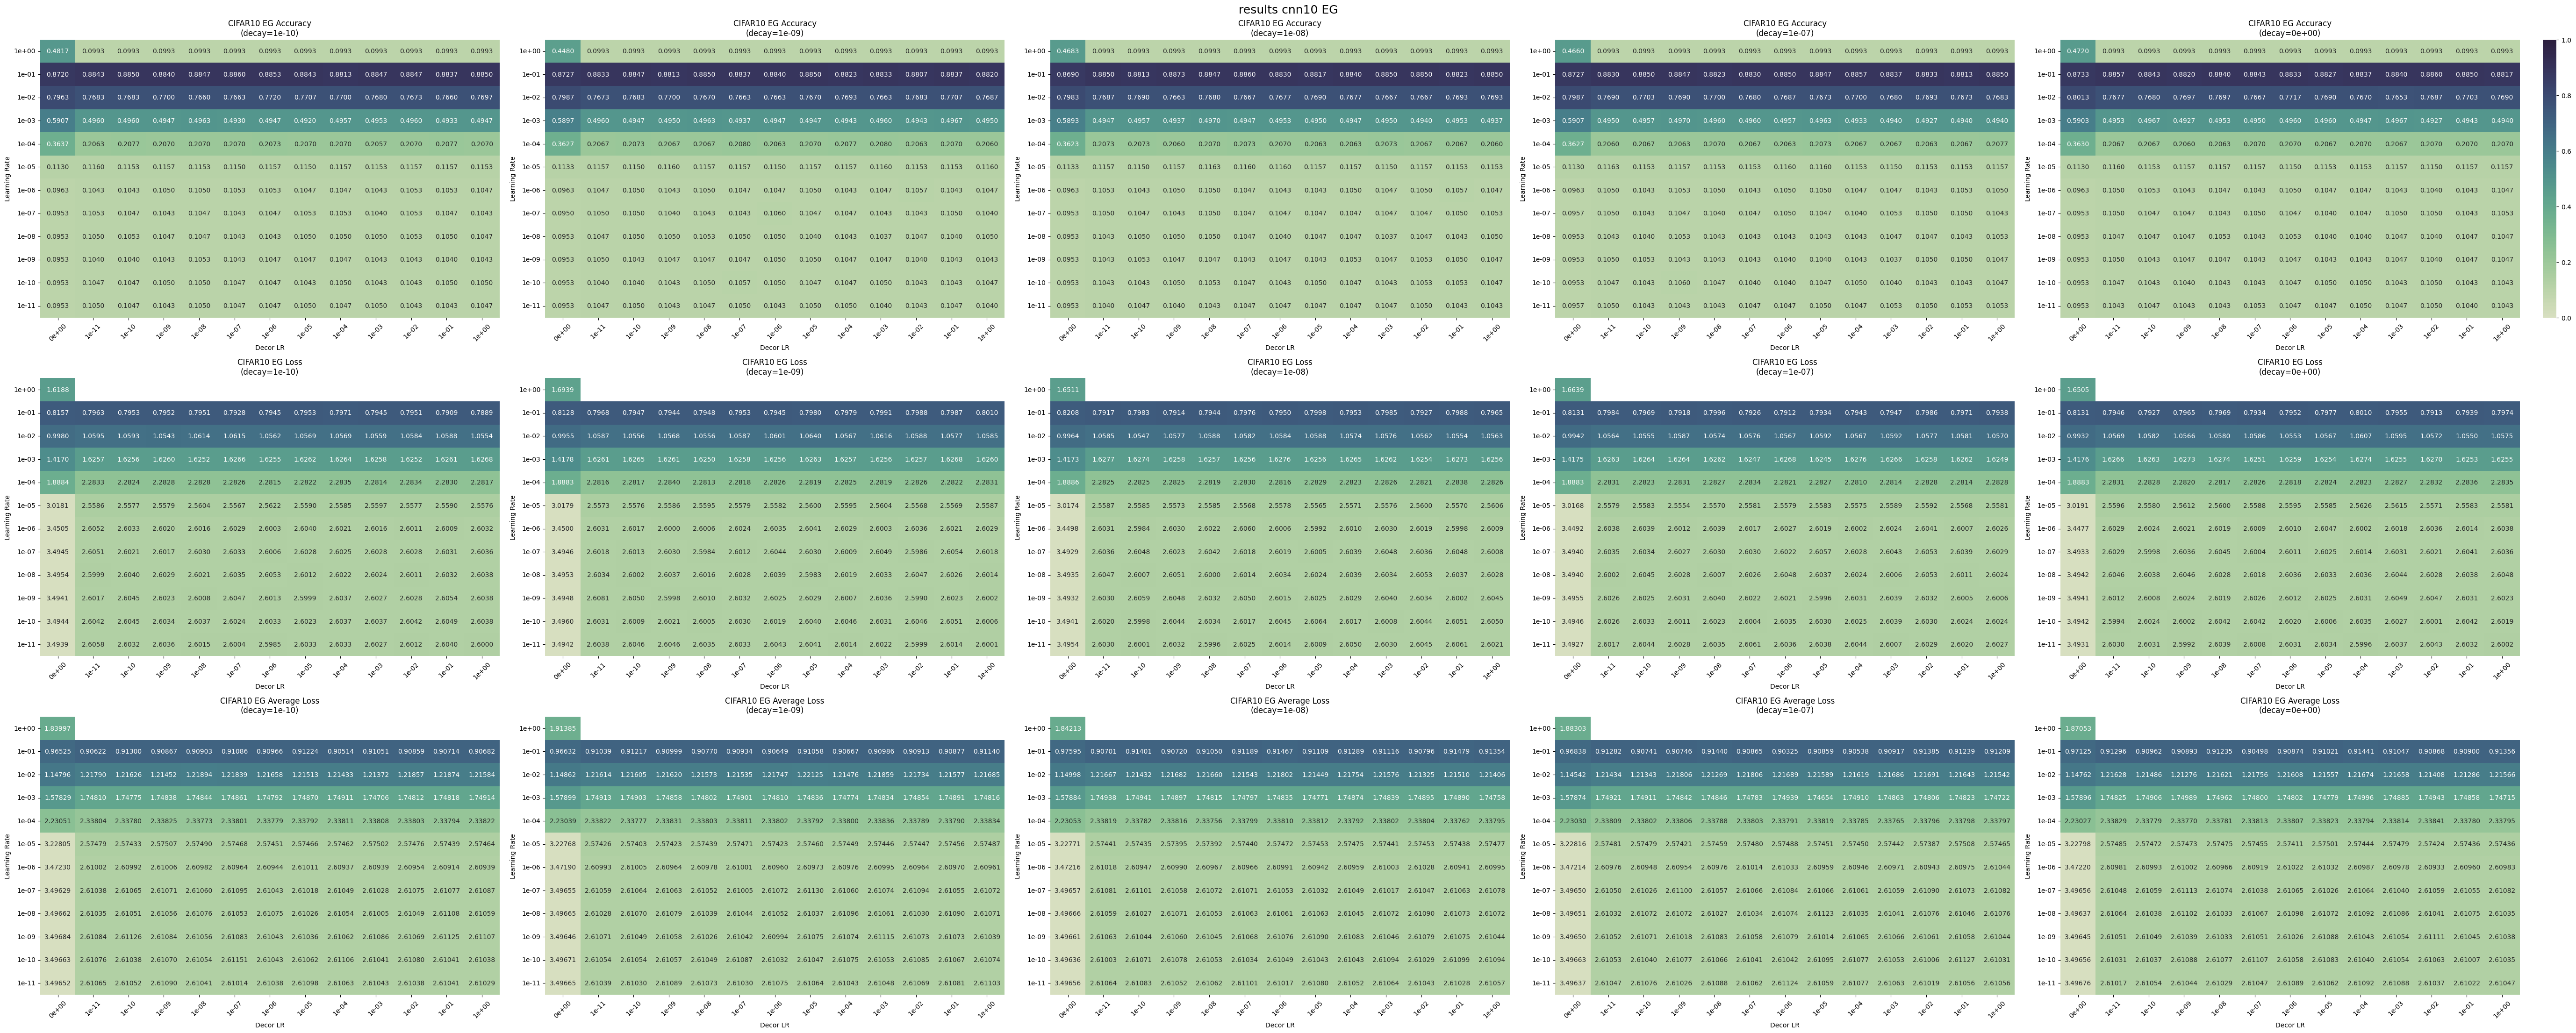

In [12]:
import torch
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import math
import matplotlib.colors as mcolors

# Create output directory
location = "results cnn10 EG"
os.makedirs(f"./{location}/Graphs", exist_ok=True)

model_dir = [f"./{location}/1", f"./{location}/22", f"./{location}/42"]
all_figures = []
data1 = []
data22 = []
data42 = []

for dir in model_dir:
    print(f"Processing: {dir}")
    for fname in sorted(os.listdir(dir)):
        
        if fname.endswith(".pt"):
            fpath = os.path.join(dir, fname)

            #print(f"Processing {fname}...")
            d1 = torch.load(fpath, map_location='cpu', weights_only=False)

            stats = d1.get("stats")
            
            # Match: (cor|decor), full_lr, dlr (optional or empty), decay
            match = re.match(r'(decor|cor)-([a-zA-Z]*[\d.eE+\-]+),([\d.eE+\-]+),([\d.eE+\-]+),(\d+)\.pt', fname)

            if not match:
                print(f"Filename format unrecognized: {fname}")
                continue

            type, raw_lr, raw_dlr, raw_decay, idx = match.groups()

            # Separate LR prefix and numeric value
            lr_match = re.match(r'^(\d+)(\d+e[+\-]?\d+)$', raw_lr, re.IGNORECASE)
            if not lr_match:
                print(f"Could not parse LR field: {raw_lr}")
                continue
            prefix, lr_val_str = lr_match.groups()
            lr = float(lr_val_str)

            # Parse DLR (if present and non-empty)
            dlr = float(raw_dlr) if raw_dlr.strip() else None

            # Parse weight decay (always present)
            decay = float(raw_decay)
            totalLoss = 0
            for i in range(len(stats[2])):
                #print(stats[2][i])
                totalLoss+=stats[2][i]

            if(dir == f"./{location}/1"):
                data1.append({"dataset": prefix, "type": type, "val_loss":stats[2][49], "learning_rate": lr, "decor_learning_rate": dlr, "val_accuracy": stats[3][49], "decay": decay, "totalLoss": totalLoss/50})
            elif(dir == f"./{location}/22"):
                data22.append({"dataset": prefix, "type": type, "val_loss":stats[2][49], "learning_rate": lr, "decor_learning_rate": dlr, "val_accuracy": stats[3][49], "decay": decay, "totalLoss": totalLoss/50})
            elif(dir == f"./{location}/42"):
                data42.append({"dataset": prefix, "type": type, "val_loss":stats[2][49], "learning_rate": lr, "decor_learning_rate": dlr, "val_accuracy": stats[3][49], "decay": decay, "totalLoss": totalLoss/50})





print("All files processed.")

# Load into DataFrame
df1 = pd.DataFrame(data1)
df22 = pd.DataFrame(data22)
df42 = pd.DataFrame(data42)

df1.to_excel(f"./{location}/df1.xlsx")
df22.to_excel(f"./{location}/df22.xlsx")
df42.to_excel(f"./{location}/df42.xlsx")

consistent = True
for (_, row1), (_, row2), (_, row3) in zip(df1.iterrows(), df22.iterrows(), df42.iterrows()):
    dataset1 = row1["dataset"]
    dataset22 = row2["dataset"]
    dataset42 = row3["dataset"]
    
    type1 = row1["type"]
    type22 = row2["type"]
    type42 = row3["type"]

    lr1 = row1["learning_rate"]
    lr22 = row2["learning_rate"]
    lr42 = row3["learning_rate"]

    dlr1 = row1["decor_learning_rate"]
    dlr22 = row2["decor_learning_rate"]
    dlr42 = row3["decor_learning_rate"]

    decay1 = row1["decay"]
    decay22 = row2["decay"]
    decay42 = row3["decay"]
    


    if(not((dataset1 == dataset22 == dataset42) and (type1 == type22 == type42) and (lr1 == lr22 == lr42) and (dlr1 == dlr22 == dlr42) and (decay1 == decay22 == decay42))):
        consistent = False
print("####################CONSISTENCY CHECK###################: ",consistent)

EG_cor_loss = []
EG_cor_acc = []
EG_decor_loss = []
EG_decor_acc = []

data = [{}]
EG_best_loss_reg = 100
EG_best_loss_params_reg = [{}]

EG_best_acc_reg = 0
EG_best_acc_params_reg = [{}]

EG_best_total_loss_reg = 100
EG_best_total_loss_params_reg = [{}]


####################
EG_cor_best_loss_reg = 100
EG_cor_best_loss_params_reg = [{}]

EG_cor_best_acc_reg = 0
EG_cor_best_acc_params_reg = [{}]

EG_cor_best_total_loss_reg = 100
EG_cor_best_total_loss_params_reg = [{}]




for (_, row1), (_, row2), (_, row3) in zip(df1.iterrows(), df22.iterrows(), df42.iterrows()):
    dataset1 = row1["dataset"]
    dataset22 = row2["dataset"]
    dataset42 = row3["dataset"]
    
    type1 = row1["type"]
    type22 = row2["type"]
    type42 = row3["type"]

    lr1 = row1["learning_rate"]
    lr22 = row2["learning_rate"]
    lr42 = row3["learning_rate"]

    dlr1 = row1["decor_learning_rate"]
    dlr22 = row2["decor_learning_rate"]
    dlr42 = row3["decor_learning_rate"]

    decay1 = row1["decay"]
    decay22 = row2["decay"]
    decay42 = row3["decay"]

    val_loss1 = row1['val_loss']
    val_acc1 = row1['val_accuracy']
    totalLoss1 = row1['totalLoss']

    val_loss2 = row2['val_loss']
    val_acc2 = row2['val_accuracy']
    totalLoss2 = row2['totalLoss']

    val_loss3 = row3['val_loss']
    val_acc3 = row3['val_accuracy']
    totalLoss3 = row3['totalLoss']

    val_loss = (val_loss1+val_loss2+val_loss3)/3
    val_acc = (val_acc1+val_acc2+val_acc3)/3
    totalLoss = (totalLoss1+totalLoss2+totalLoss3)/3

    if(dlr1 == 0):
        EG_cor_loss.append(val_loss)
        EG_cor_acc.append(val_acc)
    
    if(dlr > 0):
        EG_decor_loss.append(val_loss)
        EG_decor_acc.append(val_acc)

    if((val_loss < EG_best_loss_reg) and dataset1 == "10"):
        EG_best_loss_reg = val_loss
        EG_best_loss_params_reg[0] = ({"dataset": dataset1, "type": type1, "val_loss": val_loss, "learning_rate": f"{lr1: .0e}", "decor_learning_rate": f"{dlr1: .0e}", "val_accuracy": val_acc, "decay": decay1, "totalLoss": totalLoss})
    
    if((val_acc > EG_best_acc_reg) and dataset1 == "10"):
        EG_best_acc_reg = val_acc
        EG_best_acc_params_reg[0] = ({"dataset": dataset1, "type": type1, "val_loss": val_loss, "learning_rate": f"{lr1: .0e}", "decor_learning_rate": f"{dlr1: .0e}", "val_accuracy": val_acc, "decay": decay1, "totalLoss": totalLoss})

    if(totalLoss < EG_best_total_loss_reg) and dataset1 == "10":
        EG_best_total_loss_reg = totalLoss
        EG_best_total_loss_params_reg[0] = ({"dataset": dataset1, "type": type1, "val_loss": val_loss, "learning_rate": f"{lr1: .0e}", "decor_learning_rate": f"{dlr1: .0e}", "val_accuracy": val_acc, "decay": decay1, "totalLoss": totalLoss})



    ###########################################################################################################
    if((val_loss < EG_cor_best_loss_reg) and dataset1 == "10" and dlr1 == 0):
        EG_cor_best_loss_reg = val_loss
        EG_cor_best_loss_params_reg[0] = ({"dataset": dataset1, "type": type1, "val_loss": val_loss, "learning_rate": f"{lr1: .0e}", "decor_learning_rate": f"{dlr1: .0e}", "val_accuracy": val_acc, "decay": decay1, "totalLoss": totalLoss})
    
    if((val_acc > EG_cor_best_acc_reg) and dataset1 == "10" and dlr1 == 0):
        EG_cor_best_acc_reg = val_acc
        EG_cor_best_acc_params_reg[0] = ({"dataset": dataset1, "type": type1, "val_loss": val_loss, "learning_rate": f"{lr1: .0e}", "decor_learning_rate": f"{dlr1: .0e}", "val_accuracy": val_acc, "decay": decay1, "totalLoss": totalLoss})

    if((totalLoss < EG_cor_best_total_loss_reg) and dataset1 == "10" and dlr1 == 0):
        EG_cor_best_total_loss_reg = totalLoss
        EG_cor_best_total_loss_params_reg[0] = ({"dataset": dataset1, "type": type1, "val_loss": val_loss, "learning_rate": f"{lr1: .0e}", "decor_learning_rate": f"{dlr1: .0e}", "val_accuracy": val_acc, "decay": decay1, "totalLoss": totalLoss})

    
    data.append({"dataset": row1["dataset"], "type": row1["type"], "val_loss":val_loss, "learning_rate": f"{lr1:.0e}", "decor_learning_rate": f"{dlr1:.0e}", "val_accuracy": val_acc, "decay": row1["decay"], "totalLoss": totalLoss})

    
print("acc 10: ", EG_best_acc_params_reg)
print("loss 10: ", EG_best_loss_params_reg)
print("total loss 10", EG_best_total_loss_params_reg)


print("###########################################################################################")

print("cor acc 10: ", EG_cor_best_acc_params_reg)
print("cor loss 10: ", EG_cor_best_loss_params_reg)
print("cor total loss 10", EG_cor_best_total_loss_params_reg)



df = pd.DataFrame(data)
df.to_excel(f"./{location}/df.xlsx")







#df.to_excel("output.xlsx")

import matplotlib.pyplot as plt
import seaborn as sns

datasets = ["10"]
decay_values = [1e-10, 1e-9, 1e-8, 1e-7, 0]  # adjust as needed

fig, axes = plt.subplots(nrows=3, ncols=len(decay_values), figsize=(11 * len(decay_values), 22), constrained_layout=True)


for col, decay in enumerate(decay_values):
    for row, (dataset, metric) in enumerate([
        ("10", "val_accuracy"),
        ("10", "val_loss"),
        ("10", "totalLoss")
    ]):
        ax = axes[row, col]

        # Filter data for this dataset and decay
        df_fixed = df[(df["decay"] == decay) & (df["dataset"] == dataset)]
        if df_fixed.empty:
            ax.axis("off")
            #print(f"No data for decay={decay}, dataset={dataset}, metric={metric}, skipping...")
            continue

        # Pivot for heatmap
        heatmap_data = df_fixed.pivot(index="learning_rate", columns="decor_learning_rate", values=metric)

        # Sort columns numerically by converting scientific notation strings to float
        sorted_cols = sorted(heatmap_data.columns, key=lambda x: float(x))
        heatmap_data = heatmap_data[sorted_cols]
        from matplotlib.colors import PowerNorm

        
        norm = PowerNorm(gamma=1, vmin=0, vmax=1)  # gamma <1 boosts low-value contrast
    
        cmap = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)
        cmapr = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True, reverse=True)

        if row % 3 == 0:
            ax.set_title(f"CIFAR10 EG Accuracy\n(decay={decay:.0e})", fontsize=12)
            sns.heatmap(heatmap_data, norm=norm, vmin=0.0, vmax=1.0, annot=True, fmt=".4f", cmap=cmap, ax=ax, cbar=(row == 0 and col == len(decay_values) - 1))
        elif row % 3 == 1:
            ax.set_title(f"CIFAR10 EG Loss\n(decay={decay:.0e})", fontsize=12)
            sns.heatmap(heatmap_data, vmin=0.0, vmax=3.0, annot=True, fmt=".4f", cmap=cmapr, ax=ax, cbar=(row == 0 and col == len(decay_values) - 1))

        elif row % 3 == 2:
            ax.set_title(f"CIFAR10 EG Average Loss\n(decay={decay:.0e})", fontsize=12)
            sns.heatmap(heatmap_data, vmin=0.0, vmax=3.0, annot=True, fmt=".5f", cmap=cmapr, ax=ax, cbar=(row == 0 and col == len(decay_values) - 1))

        # ✅ Always show x and y axis labels
        ax.set_xlabel("Decor LR")
        ax.set_ylabel("Learning Rate")

        # Rotate x ticks for readability
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

        # Rotate x ticks for readability
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)



plt.suptitle(f"{location}", fontsize=18)
plt.savefig(f"./{location}/Graphs/heatmap_grid.png", dpi=300, bbox_inches="tight")
plt.show()

Processing: ./results cnn10 regular/1
Processing: ./results cnn10 regular/22
Processing: ./results cnn10 regular/42
All files processed.
####################CONSISTENCY CHECK###################:  True
acc reg:  [{'dataset': '10', 'type': 'decor', 'val_loss': 0.7524562776088715, 'learning_rate': ' 1e-02', 'decor_learning_rate': ' 1e-03', 'val_accuracy': 0.8983333333333334, 'decay': 1e-07, 'totalLoss': 0.9313295089403787}]
loss reg:  [{'dataset': '10', 'type': 'decor', 'val_loss': 0.7524562776088715, 'learning_rate': ' 1e-02', 'decor_learning_rate': ' 1e-03', 'val_accuracy': 0.8983333333333334, 'decay': 1e-07, 'totalLoss': 0.9313295089403787}]
total loss reg [{'dataset': '10', 'type': 'decor', 'val_loss': 0.7559986094633738, 'learning_rate': ' 1e-02', 'decor_learning_rate': ' 1e-08', 'val_accuracy': 0.896, 'decay': 1e-08, 'totalLoss': 0.9255371645092966}]
###########################################################################################
cor acc reg:  [{'dataset': '10', 'type': '

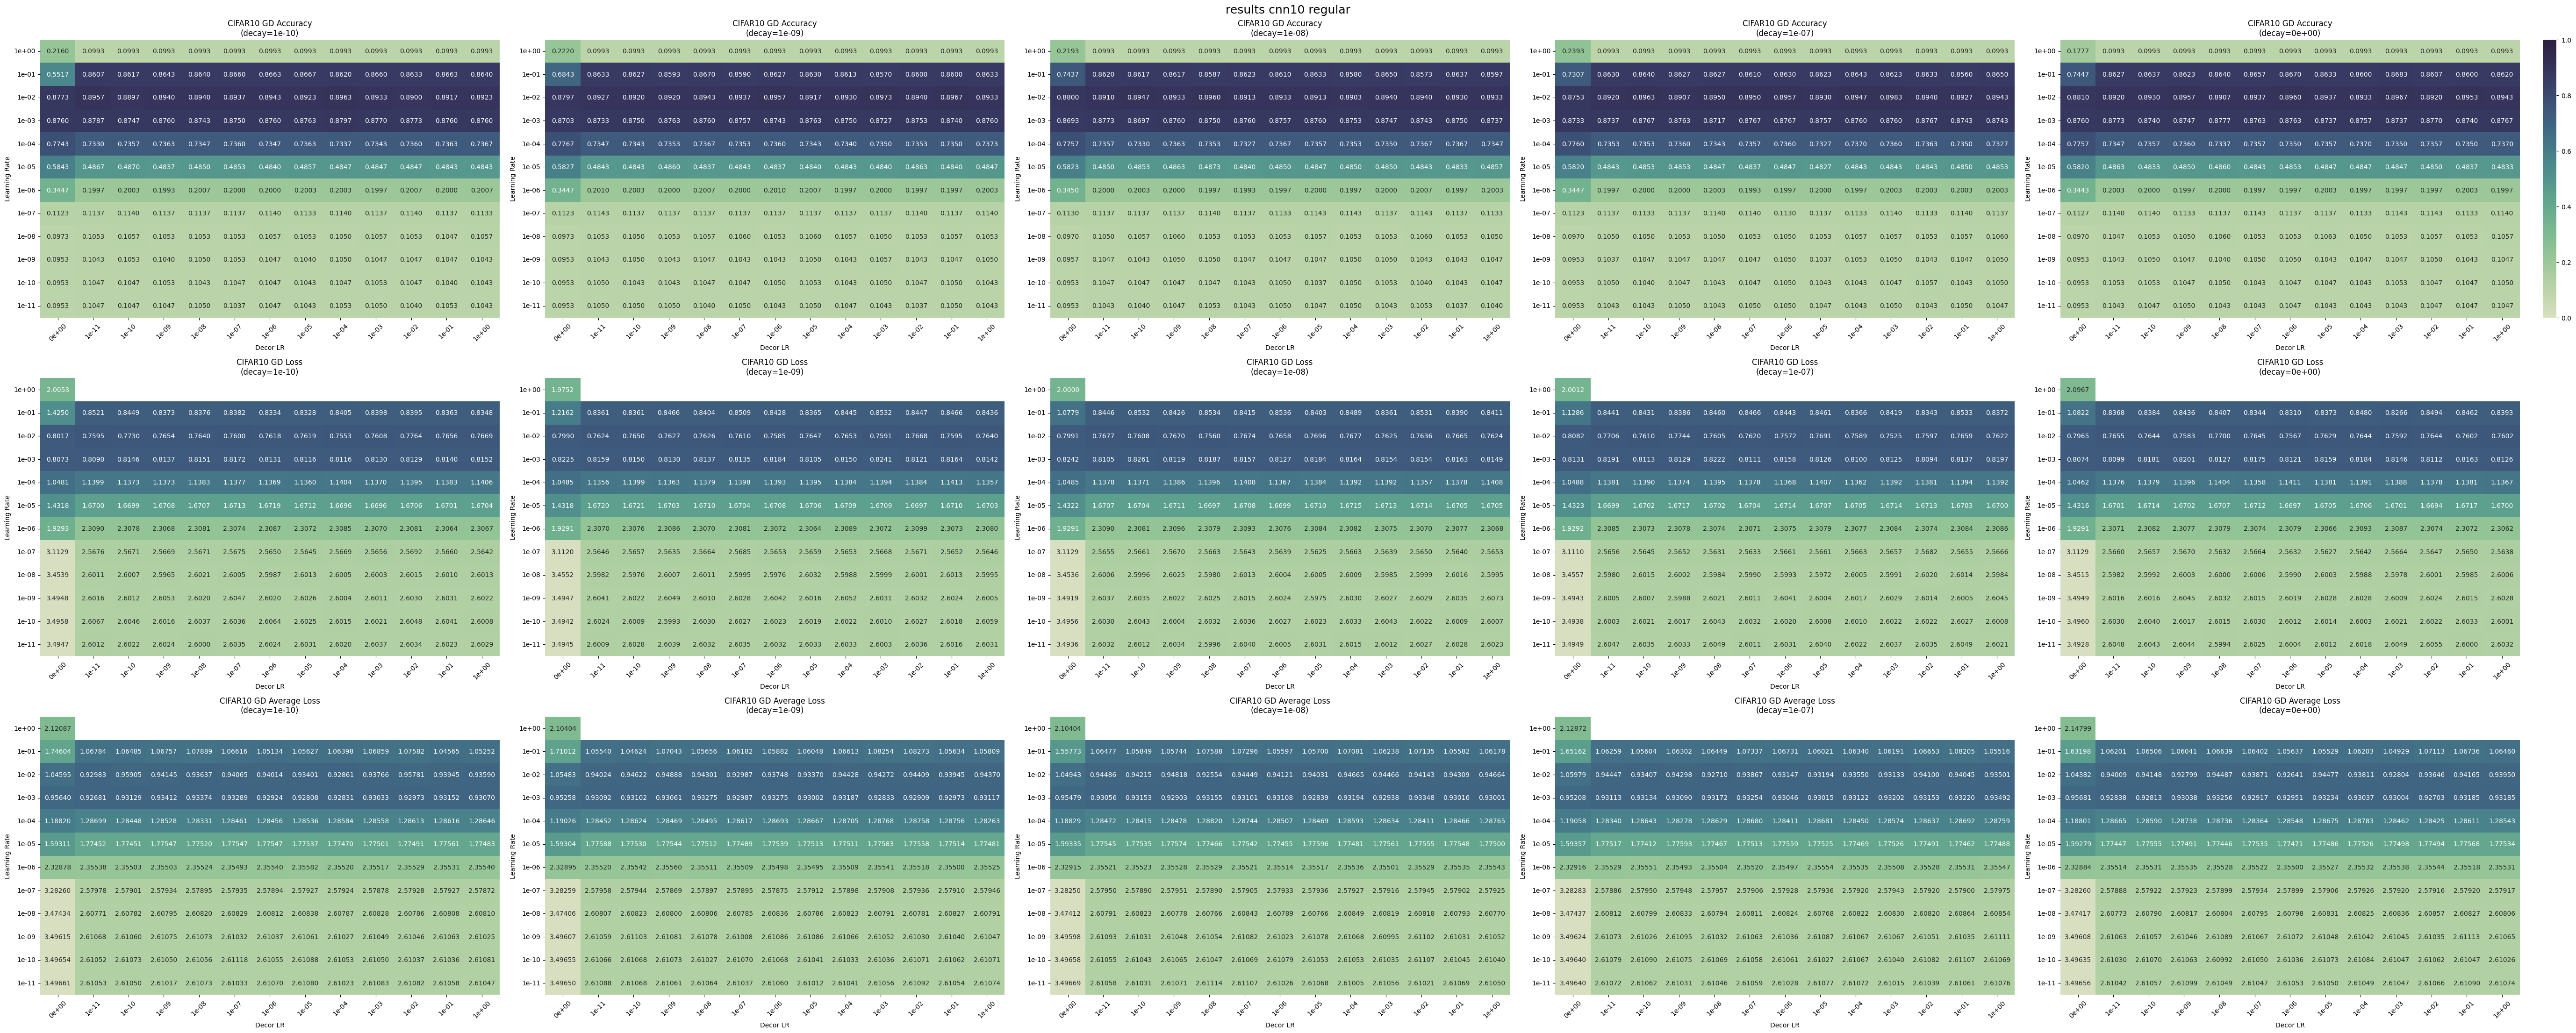

In [11]:
import torch
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import math
import matplotlib.colors as mcolors

# Create output directory
location = "results cnn10 regular"
os.makedirs(f"./{location}/Graphs", exist_ok=True)

model_dir = [f"./{location}/1", f"./{location}/22", f"./{location}/42"]
all_figures = []
data1 = []
data22 = []
data42 = []

for dir in model_dir:
    print(f"Processing: {dir}")
    for fname in sorted(os.listdir(dir)):
        
        if fname.endswith(".pt"):
            fpath = os.path.join(dir, fname)

            #print(f"Processing {fname}...")
            d1 = torch.load(fpath, map_location='cpu', weights_only=False)

            stats = d1.get("stats")
            
            # Match: (cor|decor), full_lr, dlr (optional or empty), decay
            match = re.match(r'(decor|cor)-([a-zA-Z]*[\d.eE+\-]+),([\d.eE+\-]+),([\d.eE+\-]+),(\d+)\.pt', fname)

            if not match:
                print(f"Filename format unrecognized: {fname}")
                continue

            type, raw_lr, raw_dlr, raw_decay, idx = match.groups()

            # Separate LR prefix and numeric value
            lr_match = re.match(r'^(\d+)(\d+e[+\-]?\d+)$', raw_lr, re.IGNORECASE)
            if not lr_match:
                print(f"Could not parse LR field: {raw_lr}")
                continue
            prefix, lr_val_str = lr_match.groups()
            lr = float(lr_val_str)

            # Parse DLR (if present and non-empty)
            dlr = float(raw_dlr) if raw_dlr.strip() else None

            # Parse weight decay (always present)
            decay = float(raw_decay)
            totalLoss = 0
            for i in range(len(stats[2])):
                #print(stats[2][i])
                totalLoss+=stats[2][i]

            if(dir == f"./{location}/1"):
                data1.append({"dataset": prefix, "type": type, "val_loss":stats[2][49], "learning_rate": lr, "decor_learning_rate": dlr, "val_accuracy": stats[3][49], "decay": decay, "totalLoss": totalLoss/50})
            elif(dir == f"./{location}/22"):
                data22.append({"dataset": prefix, "type": type, "val_loss":stats[2][49], "learning_rate": lr, "decor_learning_rate": dlr, "val_accuracy": stats[3][49], "decay": decay, "totalLoss": totalLoss/50})
            elif(dir == f"./{location}/42"):
                data42.append({"dataset": prefix, "type": type, "val_loss":stats[2][49], "learning_rate": lr, "decor_learning_rate": dlr, "val_accuracy": stats[3][49], "decay": decay, "totalLoss": totalLoss/50})





print("All files processed.")

# Load into DataFrame
df1 = pd.DataFrame(data1)
df22 = pd.DataFrame(data22)
df42 = pd.DataFrame(data42)

df1.to_excel(f"./{location}/df1.xlsx")
df22.to_excel(f"./{location}/df22.xlsx")
df42.to_excel(f"./{location}/df42.xlsx")

consistent = True
for (_, row1), (_, row2), (_, row3) in zip(df1.iterrows(), df22.iterrows(), df42.iterrows()):
    dataset1 = row1["dataset"]
    dataset22 = row2["dataset"]
    dataset42 = row3["dataset"]
    
    type1 = row1["type"]
    type22 = row2["type"]
    type42 = row3["type"]

    lr1 = row1["learning_rate"]
    lr22 = row2["learning_rate"]
    lr42 = row3["learning_rate"]

    dlr1 = row1["decor_learning_rate"]
    dlr22 = row2["decor_learning_rate"]
    dlr42 = row3["decor_learning_rate"]

    decay1 = row1["decay"]
    decay22 = row2["decay"]
    decay42 = row3["decay"]
    


    if(not((dataset1 == dataset22 == dataset42) and (type1 == type22 == type42) and (lr1 == lr22 == lr42) and (dlr1 == dlr22 == dlr42) and (decay1 == decay22 == decay42))):
        consistent = False
print("####################CONSISTENCY CHECK###################: ",consistent)

R_cor_loss = []
R_cor_acc = []
R_decor_loss = []
R_decor_acc = []

data = [{}]
R_best_loss_reg = 100
R_best_loss_params_reg = [{}]

R_best_acc_reg = 0
R_best_acc_params_reg = [{}]

R_best_total_loss_reg = 100
R_best_total_loss_params_reg = [{}]


####################
R_cor_best_loss_reg = 100
R_cor_best_loss_params_reg = [{}]

R_cor_best_acc_reg = 0
R_cor_best_acc_params_reg = [{}]

R_cor_best_total_loss_reg = 100
R_cor_best_total_loss_params_reg = [{}]




for (_, row1), (_, row2), (_, row3) in zip(df1.iterrows(), df22.iterrows(), df42.iterrows()):
    dataset1 = row1["dataset"]
    dataset22 = row2["dataset"]
    dataset42 = row3["dataset"]
    
    type1 = row1["type"]
    type22 = row2["type"]
    type42 = row3["type"]

    lr1 = row1["learning_rate"]
    lr22 = row2["learning_rate"]
    lr42 = row3["learning_rate"]

    dlr1 = row1["decor_learning_rate"]
    dlr22 = row2["decor_learning_rate"]
    dlr42 = row3["decor_learning_rate"]

    decay1 = row1["decay"]
    decay22 = row2["decay"]
    decay42 = row3["decay"]

    val_loss1 = row1['val_loss']
    val_acc1 = row1['val_accuracy']
    totalLoss1 = row1['totalLoss']

    val_loss2 = row2['val_loss']
    val_acc2 = row2['val_accuracy']
    totalLoss2 = row2['totalLoss']

    val_loss3 = row3['val_loss']
    val_acc3 = row3['val_accuracy']
    totalLoss3 = row3['totalLoss']

    val_loss = (val_loss1+val_loss2+val_loss3)/3
    val_acc = (val_acc1+val_acc2+val_acc3)/3
    totalLoss = (totalLoss1+totalLoss2+totalLoss3)/3

    if(dlr1 == 0):
        R_cor_loss.append(val_loss)
        R_cor_acc.append(val_acc)
    
    if(dlr > 0):
        R_decor_loss.append(val_loss)
        R_decor_acc.append(val_acc)

    if((val_loss < R_best_loss_reg) and dataset1 == "10"):
        R_best_loss_reg = val_loss
        R_best_loss_params_reg[0] = ({"dataset": dataset1, "type": type1, "val_loss": val_loss, "learning_rate": f"{lr1: .0e}", "decor_learning_rate": f"{dlr1: .0e}", "val_accuracy": val_acc, "decay": decay1, "totalLoss": totalLoss})
    
    if((val_acc > R_best_acc_reg) and dataset1 == "10"):
        R_best_acc_reg = val_acc
        R_best_acc_params_reg[0] = ({"dataset": dataset1, "type": type1, "val_loss": val_loss, "learning_rate": f"{lr1: .0e}", "decor_learning_rate": f"{dlr1: .0e}", "val_accuracy": val_acc, "decay": decay1, "totalLoss": totalLoss})

    if(totalLoss < R_best_total_loss_reg) and dataset1 == "10":
        R_best_total_loss_reg = totalLoss
        R_best_total_loss_params_reg[0] = ({"dataset": dataset1, "type": type1, "val_loss": val_loss, "learning_rate": f"{lr1: .0e}", "decor_learning_rate": f"{dlr1: .0e}", "val_accuracy": val_acc, "decay": decay1, "totalLoss": totalLoss})

    
    ###########################################################################################################
    if((val_loss < R_cor_best_loss_reg) and dataset1 == "10" and dlr1 == 0):
        R_cor_best_loss_reg = val_loss
        R_cor_best_loss_params_reg[0] = ({"dataset": dataset1, "type": type1, "val_loss": val_loss, "learning_rate": f"{lr1: .0e}", "decor_learning_rate": f"{dlr1: .0e}", "val_accuracy": val_acc, "decay": decay1, "totalLoss": totalLoss})
    
    if((val_acc > R_cor_best_acc_reg) and dataset1 == "10" and dlr1 == 0):
        R_cor_best_acc_reg = val_acc
        R_cor_best_acc_params_reg[0] = ({"dataset": dataset1, "type": type1, "val_loss": val_loss, "learning_rate": f"{lr1: .0e}", "decor_learning_rate": f"{dlr1: .0e}", "val_accuracy": val_acc, "decay": decay1, "totalLoss": totalLoss})

    if((totalLoss < R_cor_best_total_loss_reg) and dataset1 == "10" and dlr1 == 0):
        R_cor_best_total_loss_reg = totalLoss
        R_cor_best_total_loss_params_reg[0] = ({"dataset": dataset1, "type": type1, "val_loss": val_loss, "learning_rate": f"{lr1: .0e}", "decor_learning_rate": f"{dlr1: .0e}", "val_accuracy": val_acc, "decay": decay1, "totalLoss": totalLoss})

    

    data.append({"dataset": row1["dataset"], "type": row1["type"], "val_loss":val_loss, "learning_rate": f"{lr1:.0e}", "decor_learning_rate": f"{dlr1:.0e}", "val_accuracy": val_acc, "decay": row1["decay"], "totalLoss": totalLoss})

print("acc reg: ", R_best_acc_params_reg)
print("loss reg: ", R_best_loss_params_reg)
print("total loss reg", R_best_total_loss_params_reg)


print("###########################################################################################")

print("cor acc reg: ", R_cor_best_acc_params_reg)
print("cor loss reg: ", R_cor_best_loss_params_reg)
print("cor total loss reg", R_cor_best_total_loss_params_reg)

    


df = pd.DataFrame(data)
df.to_excel(f"./{location}/df.xlsx")




#df.to_excel("output.xlsx")

import matplotlib.pyplot as plt
import seaborn as sns

datasets = ["k", "reg"]
decay_values = [1e-10, 1e-9, 1e-8, 1e-7, 0]  # adjust as needed

fig, axes = plt.subplots(nrows=3, ncols=len(decay_values), figsize=(11 * len(decay_values), 22), constrained_layout=True)


for col, decay in enumerate(decay_values):
    for row, (dataset, metric) in enumerate([
        ("10", "val_accuracy"),
        ("10", "val_loss"),
        ("10", "totalLoss")

    ]):
        ax = axes[row, col]

        # Filter data for this dataset and decay
        df_fixed = df[(df["decay"] == decay) & (df["dataset"] == dataset)]
        if df_fixed.empty:
            ax.axis("off")
            #print(f"No data for decay={decay}, dataset={dataset}, metric={metric}, skipping...")
            continue

        # Pivot for heatmap
        heatmap_data = df_fixed.pivot(index="learning_rate", columns="decor_learning_rate", values=metric)

        # Sort columns numerically by converting scientific notation strings to float
        sorted_cols = sorted(heatmap_data.columns, key=lambda x: float(x))
        heatmap_data = heatmap_data[sorted_cols]
        from matplotlib.colors import PowerNorm

        
        norm = PowerNorm(gamma=1, vmin=0, vmax=1)  # gamma <1 boosts low-value contrast
    
        cmap = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)
        cmapr = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True, reverse=True)

        if row % 3 == 0:
            ax.set_title(f"CIFAR10 GD Accuracy\n(decay={decay:.0e})", fontsize=12)
            sns.heatmap(heatmap_data, norm=norm, vmin=0.0, vmax=1.0, annot=True, fmt=".4f", cmap=cmap, ax=ax, cbar=(row == 0 and col == len(decay_values) - 1))
        elif row % 3 == 1:
            ax.set_title(f"CIFAR10 GD Loss\n(decay={decay:.0e})", fontsize=12)
            sns.heatmap(heatmap_data, vmin=0.0, vmax=3.0, annot=True, fmt=".4f", cmap=cmapr, ax=ax, cbar=(row == 0 and col == len(decay_values) - 1))

        elif row % 3 == 2:
            ax.set_title(f"CIFAR10 GD Average Loss\n(decay={decay:.0e})", fontsize=12)
            sns.heatmap(heatmap_data, vmin=0.0, vmax=3.0, annot=True, fmt=".5f", cmap=cmapr, ax=ax, cbar=(row == 0 and col == len(decay_values) - 1))

        # ✅ Always show x and y axis labels
        ax.set_xlabel("Decor LR")
        ax.set_ylabel("Learning Rate")

        # Rotate x ticks for readability
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

        # Rotate x ticks for readability
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)



plt.suptitle(f"{location}", fontsize=18)
plt.savefig(f"./{location}/Graphs/heatmap_grid.png", dpi=300, bbox_inches="tight")
plt.show()

In [4]:
# Create output directory
location = "results cnntest"
os.makedirs(f"./{location}/Graphs", exist_ok=True)

model_dir = [f"./{location}/1", f"./{location}/22", f"./{location}/42"]
all_figures = []
data1 = []
data22 = []
data42 = []
j=0
for dir in model_dir:
    #print(f"Processing: {dir}")
    for fname in sorted(os.listdir(dir)):
        
        if fname.endswith(".pt"):
            #print("pt")
            fpath = os.path.join(dir, fname)

            #print(f"Processing {fname}...")
            d1 = torch.load(fpath, map_location='cpu', weights_only=False)
            pattern = r"-(10)-([a-z]+)-"
            match = re.search(pattern, fname, re.IGNORECASE)
            if match:
                prefix = "10"
                type = match.group(2).lower()
                #print(dataset, prefix)

            stats = d1.get("stats")
            lr = d1.get("learning_rate")
            dlr = d1.get("decor_learning_rate")
            decay = d1.get("decay")

            totalLoss = 0
            for i in range(len(stats[2])):
                totalLoss+=stats[2][i]

            if(j==0):
                #print("1")
                data1.append({"name": fname, "dataset": prefix, "type": type, "val_loss":stats[2][49], "learning_rate": lr, "decor_learning_rate": dlr, "val_accuracy": stats[3][49], "decay": decay, "totalLoss": totalLoss/50})
            elif(j==1):
                #print("2")
                data22.append({"name": fname, "dataset": prefix, "type": type, "val_loss":stats[2][49], "learning_rate": lr, "decor_learning_rate": dlr, "val_accuracy": stats[3][49], "decay": decay, "totalLoss": totalLoss/50})
            elif(j==2):
               # print("3")
                data42.append({"name": fname, "dataset": prefix, "type": type, "val_loss":stats[2][49], "learning_rate": lr, "decor_learning_rate": dlr, "val_accuracy": stats[3][49], "decay": decay, "totalLoss": totalLoss/50})

    j+=1
df1 = pd.DataFrame(data1)
df1.to_excel(f"./{location}/data1.xlsx")

merged_data = []

# Assuming all three lists have the same length and same ordering
for d1, d2, d3 in zip(data1, data22, data42):
    merged_data.append({
        "name": d1["name"],  # assuming they are the same
        "dataset": d1["dataset"],
        "type": d1["type"],
        "learning_rate": d1["learning_rate"],
        "decor_learning_rate": d1["decor_learning_rate"],
        "decay": d1["decay"],
        "val_loss": (d1["val_loss"] + d2["val_loss"] + d3["val_loss"]) / 3,
        "val_accuracy": (d1["val_accuracy"] + d2["val_accuracy"] + d3["val_accuracy"]) / 3,
        "totalLoss": (d1["totalLoss"] + d2["totalLoss"] + d3["totalLoss"]) / 3
    })

df = pd.DataFrame(merged_data)
df.to_excel(f"./{location}/df.xlsx")

def row_as_dict(df_slice: pd.DataFrame) -> dict:
    """
    Convert a 1-row filtered DataFrame to a dict of scalars.
    Learning rates will be formatted in compact scientific notation (1e-04 style).
    """
    if isinstance(df_slice, pd.Series):
        row_dict = df_slice.to_dict()
    elif isinstance(df_slice, pd.DataFrame):
        if df_slice.empty:
            raise ValueError("row_as_dict: the filtered DataFrame is empty (no matching row).")
        if len(df_slice) > 1:
            df_slice = df_slice.iloc[[0]]
        row_dict = df_slice.iloc[0].to_dict()
    else:
        raise TypeError(f"row_as_dict expects a DataFrame/Series, got {type(df_slice)}")

    # Compact scientific notation for learning rate (e.g., 1e-04 instead of 1.000000e-04)
    if "learning_rate" in row_dict:
        try:
            lr = float(row_dict["learning_rate"])
            row_dict["learning_rate"] = f"{lr:.0e}"  # no decimal part
        except ValueError:
            pass
    if "decor_learning_rate" in row_dict:
        try:
            dlr = float(row_dict["decor_learning_rate"])
            row_dict["decor_learning_rate"] = f"{dlr:.0e}"  # no decimal part
        except ValueError:
            pass

    return row_dict

###################GD######################

R_best_acc_params_reg[0] = row_as_dict(df[df["name"] == "GD-best-acc-10-decor-1.pt"])
R_best_loss_params_reg[0] = row_as_dict(df[df["name"] == "GD-best-loss-10-decor-1.pt"])
R_best_total_loss_params_reg[0] = row_as_dict(df[df["name"] == "GD-best-avgloss-10-decor-1.pt"])

print("###########################################################################################")

R_cor_best_acc_params_reg[0] = row_as_dict(df[df["name"] == "GD-best-acc-10-cor-1.pt"])
R_cor_best_loss_params_reg[0] = row_as_dict(df[df["name"] == "GD-best-loss-10-cor-1.pt"])
R_cor_best_total_loss_params_reg[0] = row_as_dict(df[df["name"] == "GD-best-avgloss-10-cor-1.pt"])

#########################EG######################
EG_best_acc_params_reg[0] = row_as_dict(df[df["name"] == "EG-best-acc-10-decor-1.pt"])
EG_best_loss_params_reg[0] = row_as_dict(df[df["name"] == "EG-best-loss-10-decor-1.pt"])
EG_best_total_loss_params_reg[0] = row_as_dict(df[df["name"] == "EG-best-avgloss-10-decor-1.pt"])

print("###########################################################################################")

EG_cor_best_acc_params_reg[0] = row_as_dict(df[df["name"] == "EG-best-acc-10-cor-1.pt"])
EG_cor_best_loss_params_reg[0] = row_as_dict(df[df["name"] == "EG-best-loss-10-cor-1.pt"])
EG_cor_best_total_loss_params_reg[0] = row_as_dict(df[df["name"] == "EG-best-avgloss-10-cor-1.pt"])

########################EGB#######################
EGB_best_acc_params_reg[0] = row_as_dict(df[df["name"] == "EGB-best-acc-10-decor-1.pt"])
EGB_best_loss_params_reg[0] = row_as_dict(df[df["name"] == "EGB-best-loss-10-decor-1.pt"])
EGB_best_total_loss_params_reg[0] = row_as_dict(df[df["name"] == "EGB-best-avgloss-10-decor-1.pt"])

print("###########################################################################################")

EGB_cor_best_acc_params_reg[0] = row_as_dict(df[df["name"] == "EGB-best-acc-10-cor-1.pt"])
EGB_cor_best_loss_params_reg[0] = row_as_dict(df[df["name"] == "EGB-best-loss-10-cor-1.pt"])
EGB_cor_best_total_loss_params_reg[0] = row_as_dict(df[df["name"] == "EGB-best-avgloss-10-cor-1.pt"])



###########################################################################################
###########################################################################################
###########################################################################################


In [5]:
print("acc 10: ",EGB_best_acc_params_reg)
print("loss 10: ", EGB_best_loss_params_reg)
print("total loss 10", EGB_best_total_loss_params_reg)


print("###########################################################################################")

print("cor acc 10: ", EGB_cor_best_acc_params_reg)
print("cor loss 10: ", EGB_cor_best_loss_params_reg)
print("cor total loss 10", EGB_cor_best_total_loss_params_reg)

acc 10:  [{'name': 'EGB-best-acc-10-decor-1.pt', 'dataset': '10', 'type': 'decor', 'learning_rate': '1e-01', 'decor_learning_rate': '1e-03', 'decay': 1e-09, 'val_loss': 0.8065664817889532, 'val_accuracy': 0.8813333333333334, 'totalLoss': 0.9133716700077058}]
loss 10:  [{'name': 'EGB-best-loss-10-decor-1.pt', 'dataset': '10', 'type': 'decor', 'learning_rate': '1e-01', 'decor_learning_rate': '1e-03', 'decay': 1e-09, 'val_loss': 0.8048159410556158, 'val_accuracy': 0.8813333333333334, 'totalLoss': 0.9133906074762342}]
total loss 10 [{'name': 'EGB-best-avgloss-10-decor-1.pt', 'dataset': '10', 'type': 'decor', 'learning_rate': '1e-01', 'decor_learning_rate': '1e-06', 'decay': 1e-07, 'val_loss': 0.8052014211813608, 'val_accuracy': 0.8796666666666667, 'totalLoss': 0.9169877976973851}]
###########################################################################################
cor acc 10:  [{'name': 'EGB-best-acc-10-cor-1.pt', 'dataset': '10', 'type': 'cor', 'learning_rate': '1e-01', 'decor_lear

C:\Users\teowe\AppData\Local\Temp\ipykernel_24444\3408177938.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Accuracy"])
C:\Users\teowe\AppData\Local\Temp\ipykernel_24444\3408177938.py:71: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes1[1].legend(title="Model")


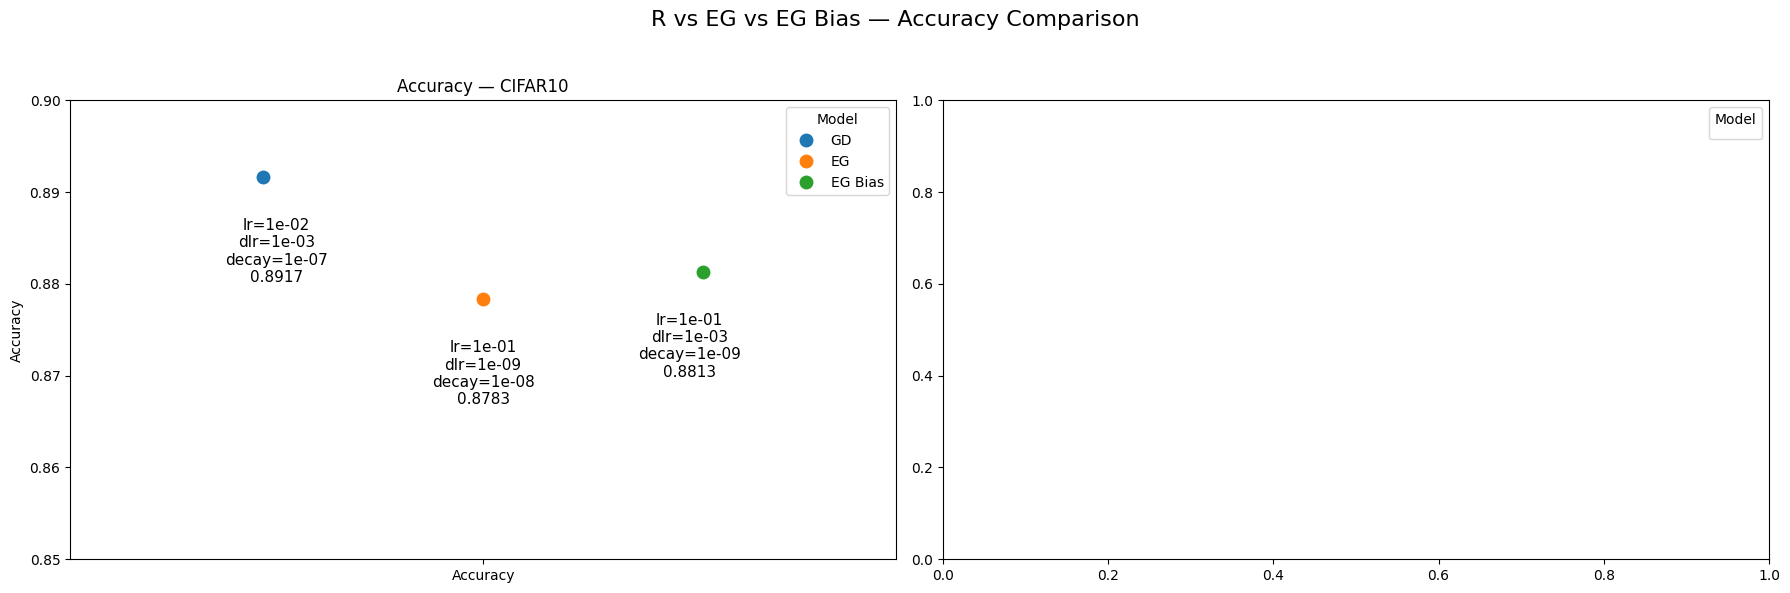

C:\Users\teowe\AppData\Local\Temp\ipykernel_24444\3408177938.py:109: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes2[1].legend(title="Model")


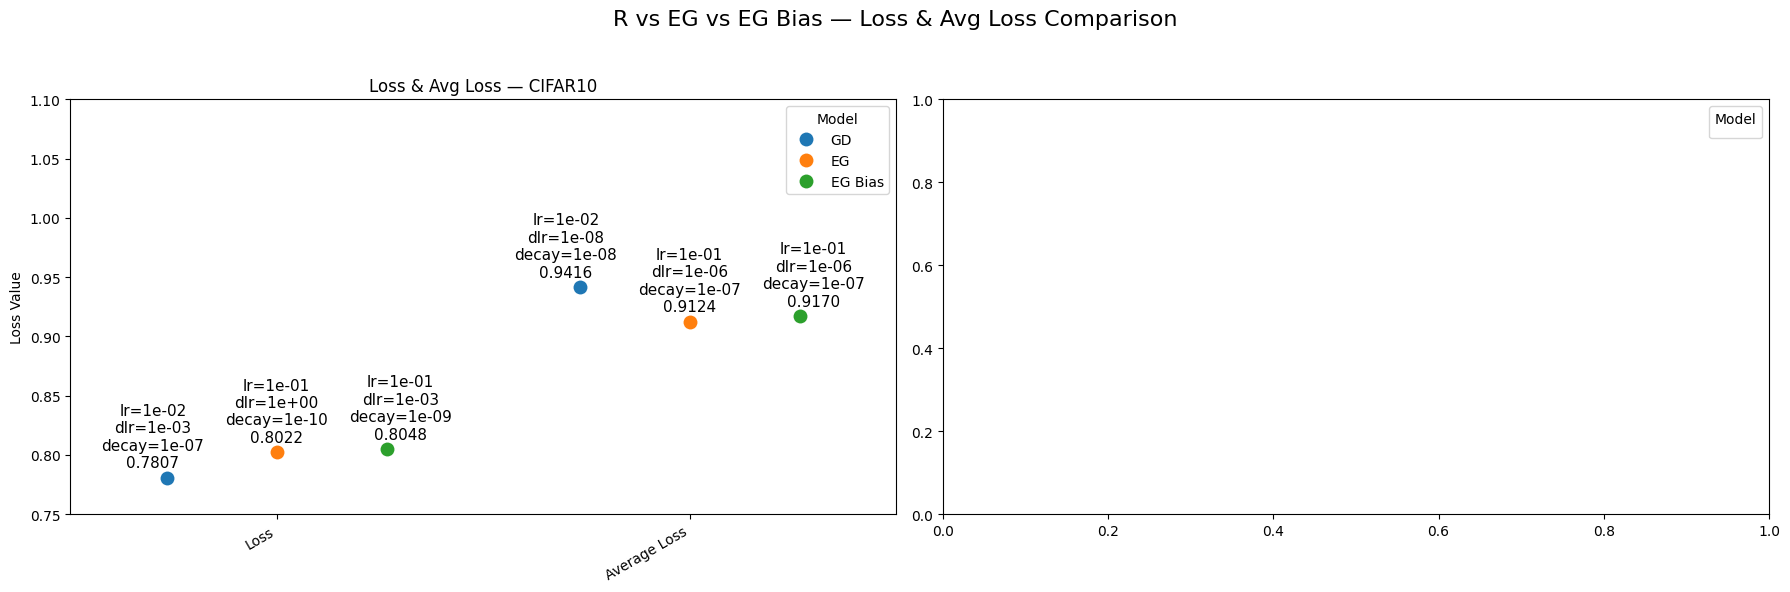

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# === Build Data ===
data = []

def add_rows(metric_name, dataset_name, R, EG, EGB, key):
    data.append((
        metric_name, dataset_name, "GD", R[key],
        R["learning_rate"], R["decor_learning_rate"], R["decay"]
    ))
    data.append((
        metric_name, dataset_name, "EG", EG[key],
        EG["learning_rate"], EG["decor_learning_rate"], EG["decay"]
    ))
    data.append((
        metric_name, dataset_name, "EG Bias", EGB[key],
        EGB["learning_rate"], EGB["decor_learning_rate"], EGB["decay"]
    ))

# === Add rows for MNIST ===
add_rows("Accuracy", "CIFAR10", R_best_acc_params_reg[0], EG_best_acc_params_reg[0], EGB_best_acc_params_reg[0], "val_accuracy")
add_rows("Loss", "CIFAR10", R_best_loss_params_reg[0], EG_best_loss_params_reg[0], EGB_best_loss_params_reg[0], "val_loss")
add_rows("Average Loss", "CIFAR10", R_best_total_loss_params_reg[0], EG_best_total_loss_params_reg[0], EGB_best_total_loss_params_reg[0], "totalLoss")


# === DataFrame ===
df_all = pd.DataFrame(data, columns=[
    "Metric", "Dataset", "Model", "Value",
    "Learning Rate", "Decor Learning Rate", "Decay"
])
df_all["MetricGroup"] = df_all["Metric"] + " (" + df_all["Dataset"] + ")"

# === Split data ===
df_acc = df_all[df_all["Metric"] == "Accuracy"]
df_loss = df_all[df_all["Metric"].isin(["Loss", "Average Loss"])]

# === Plot 1: Accuracy ===
fig1, axes1 = plt.subplots(1, 2, figsize=(18, 6))
for i, dataset in enumerate(["CIFAR10"]):
    df_subset = df_acc[df_acc["Dataset"] == dataset]
    ax = axes1[i]

    sns.stripplot(data=df_subset, x="Metric", y="Value", hue="Model", size=10, jitter=False, dodge=True, ax=ax)

    for _, row in df_subset.iterrows():
        x_offset = {"GD": -0.25, "EG": 0.0, "EG Bias": 0.25}[row["Model"]]
        y_offset = 0.02 * (df_all["Value"].max() - df_all["Value"].min())-0.015
        label = (
            f"lr={row['Learning Rate']}\n"
            f"dlr={row['Decor Learning Rate']}\n"
            f"decay={row['Decay']}\n"
            f"{row['Value']:.4f}"
        )
        ax.text(
            x=0 + x_offset,  # only one metric: "Accuracy"
            y=row["Value"] + y_offset,
            s=label,
            ha='center', va='bottom', fontsize=11
        )

    ax.set_title(f"Accuracy — {dataset}")
    ax.set_ylabel("Accuracy")
    ax.set_ylim(0.85, 0.9)
    ax.set_xlabel("")
    ax.set_xticklabels(["Accuracy"])

fig1.suptitle("R vs EG vs EG Bias — Accuracy Comparison", fontsize=16)
fig1.tight_layout(rect=[0, 0, 1, 0.95])
axes1[1].legend(title="Model")
plt.show()

# === Plot 2: Loss & Average Loss ===
fig2, axes2 = plt.subplots(1, 2, figsize=(18, 6))
for i, dataset in enumerate(["CIFAR10"]):
    df_subset = df_loss[df_loss["Dataset"] == dataset]
    ax = axes2[i]

    sns.stripplot(data=df_subset, x="Metric", y="Value", hue="Model", size=10, jitter=False, dodge=True, ax=ax)

    x_labels = list(df_subset["Metric"].unique())
    for _, row in df_subset.iterrows():
        x_pos = x_labels.index(row["Metric"])
        x_offset = {"GD": -0.3, "EG": 0.0, "EG Bias": 0.3}[row["Model"]]
        y_offset = 0.04 * (df_all["Value"].max() - df_all["Value"].min())
        label = (
            f"lr={row['Learning Rate']}\n"
            f"dlr={row['Decor Learning Rate']}\n"
            f"decay={row['Decay']}\n"
            f"{row['Value']:.4f}"
        )
        ax.text(
            x=x_pos + x_offset,
            y=row["Value"] + y_offset,
            s=label,
            ha='center', va='bottom', fontsize=11
        )

    ax.set_title(f"Loss & Avg Loss — {dataset}")
    ax.set_ylabel("Loss Value")
    ax.set_ylim(0.75, 1.1)
    ax.set_xlabel("")
    ax.set_xticks(range(len(x_labels)))
    ax.set_xticklabels(x_labels, rotation=30, ha='right')

fig2.suptitle("R vs EG vs EG Bias — Loss & Avg Loss Comparison", fontsize=16)
fig2.tight_layout(rect=[0, 0, 1, 0.95])
axes2[1].legend(title="Model")
plt.show()


C:\Users\teowe\AppData\Local\Temp\ipykernel_24444\4045051614.py:76: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend(title="Model")  # Put legend on second plot


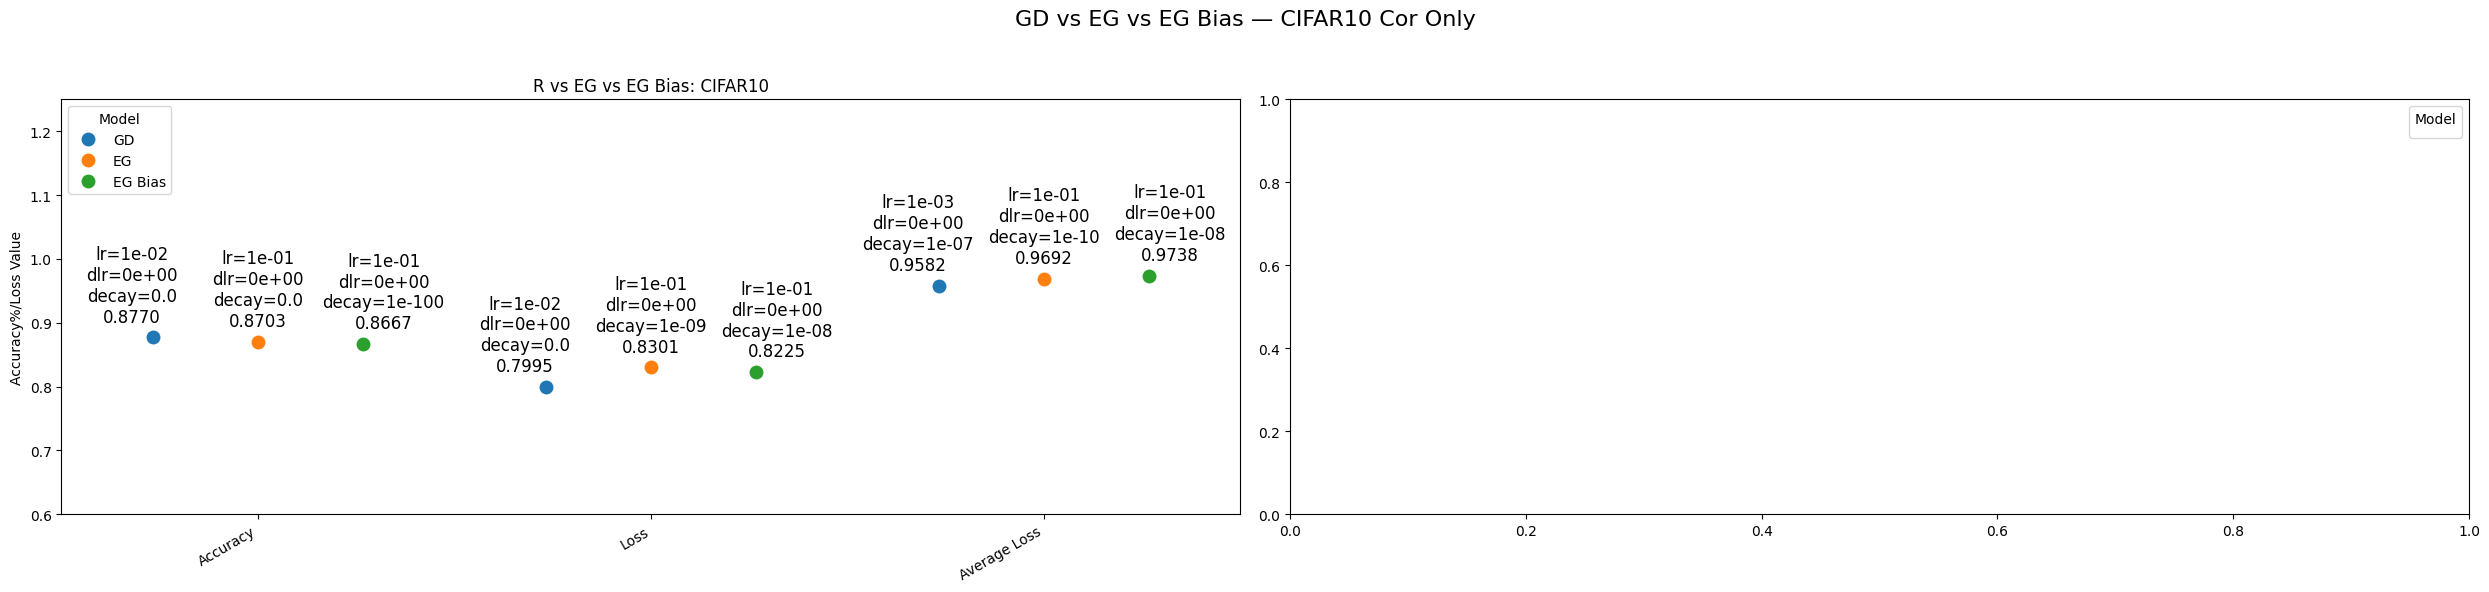

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# === Build Data ===
data = []

def add_rows(metric_name, dataset_name, R, EG, EGB, key):
    data.append((
        metric_name, dataset_name, "GD", R[key],
        R["learning_rate"], R["decor_learning_rate"], R["decay"]
    ))
    data.append((
        metric_name, dataset_name, "EG", EG[key],
        EG["learning_rate"], EG["decor_learning_rate"], EG["decay"]
    ))
    data.append((
        metric_name, dataset_name, "EG Bias", EGB[key],
        EGB["learning_rate"], EGB["decor_learning_rate"], EGB["decay"]
    ))
        
# === Add rows for MNIST ===
add_rows("Accuracy", "CIFAR10", R_cor_best_acc_params_reg[0], EG_cor_best_acc_params_reg[0], EGB_cor_best_acc_params_reg[0], "val_accuracy")
add_rows("Loss", "CIFAR10", R_cor_best_loss_params_reg[0], EG_cor_best_loss_params_reg[0], EGB_cor_best_loss_params_reg[0], "val_loss")
add_rows("Average Loss", "CIFAR10", R_cor_best_total_loss_params_reg[0], EG_cor_best_total_loss_params_reg[0], EGB_cor_best_total_loss_params_reg[0], "totalLoss")


# === DataFrame ===
df_all = pd.DataFrame(data, columns=[
    "Metric", "Dataset", "Model", "Value",
    "Learning Rate", "Decor Learning Rate", "Decay"
])
df_all["MetricGroup"] = df_all["Metric"] + " (" + df_all["Dataset"] + ")"

# === Plotting ===
fig, axes = plt.subplots(1, 2, figsize=(25, 6))

for i, dataset in enumerate(["CIFAR10"]):
    df_subset = df_all[df_all["Dataset"] == dataset]
    ax = axes[i]
    
    sns.stripplot(data=df_subset, x="Metric", y="Value", hue="Model", size=10, jitter=False, dodge=True, ax=ax)
    
    x_labels = list(df_subset["Metric"].unique())
    for _, row in df_subset.iterrows():
        x_pos = x_labels.index(row["Metric"])
        x_offset = {"GD": -0.32, "EG": 0.0, "EG Bias": 0.32}[row["Model"]]
        y_offset = 0.02 * (df_all["Value"].max() - df_all["Value"].min())+0.015

        label = (
            f"lr={row['Learning Rate']}\n"
            f"dlr={row['Decor Learning Rate']}\n"
            f"decay={row['Decay']}\n"
            f"{row['Value']:.4f}"
        )

        ax.text(
            x=x_pos + x_offset,
            y=row["Value"] + y_offset,
            s=label,
            ha='center',
            va='bottom',
            fontsize=12
        )

    ax.set_title(f"R vs EG vs EG Bias: {dataset}")
    ax.set_xlabel("")
    ax.set_xticks(range(len(x_labels)))
    ax.set_xticklabels(x_labels, rotation=30, ha='right')
    ax.set_ylabel("Accuracy%/Loss Value")
    ax.set_ylim(0.6, 1.25)

# Final touches
fig.suptitle("GD vs EG vs EG Bias — CIFAR10 Cor Only", fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.95])
axes[1].legend(title="Model")  # Put legend on second plot
plt.show()


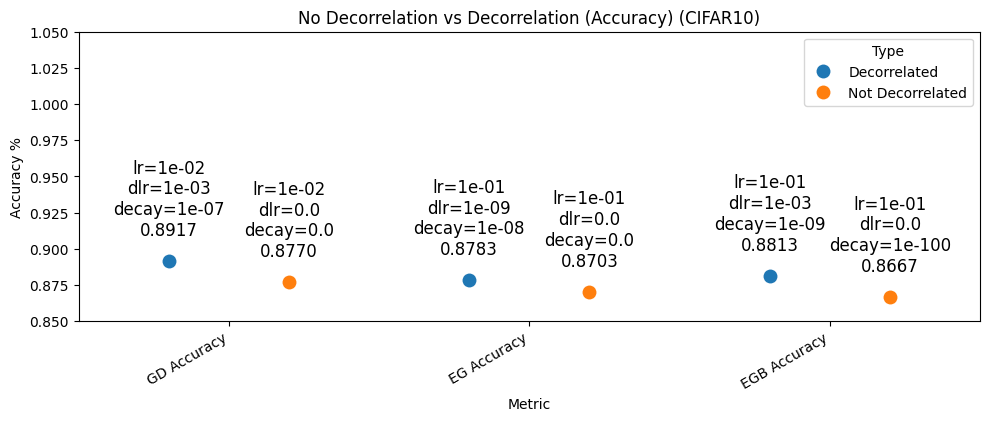

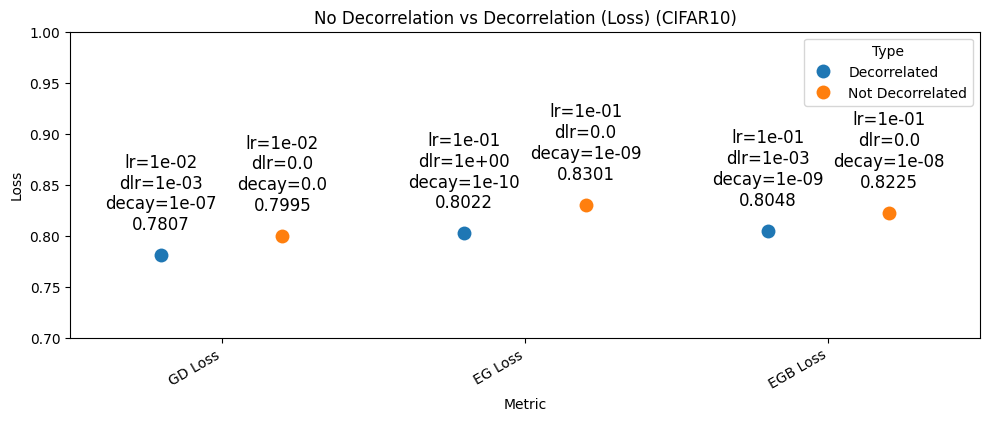

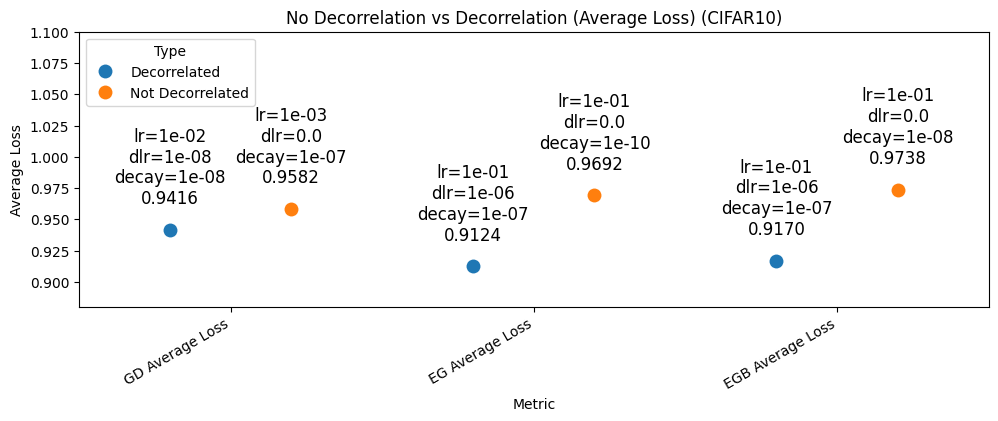

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = []

# Regular
data += [("GD Accuracy", "Decorrelated", R_best_acc_params_reg[0]["val_accuracy"],
          R_best_acc_params_reg[0]["learning_rate"], R_best_acc_params_reg[0]["decor_learning_rate"], R_best_acc_params_reg[0]["decay"])]
data += [("GD Accuracy", "Not Decorrelated", R_cor_best_acc_params_reg[0]["val_accuracy"],
          R_cor_best_acc_params_reg[0]["learning_rate"], 0.0, R_cor_best_acc_params_reg[0]["decay"])]

data += [("GD Loss", "Decorrelated", R_best_loss_params_reg[0]["val_loss"],
          R_best_loss_params_reg[0]["learning_rate"], R_best_loss_params_reg[0]["decor_learning_rate"], R_best_loss_params_reg[0]["decay"])]
data += [("GD Loss", "Not Decorrelated", R_cor_best_loss_params_reg[0]["val_loss"],
          R_cor_best_loss_params_reg[0]["learning_rate"], 0.0, R_cor_best_loss_params_reg[0]["decay"])]

data += [("GD Average Loss", "Decorrelated", R_best_total_loss_params_reg[0]["totalLoss"],
          R_best_total_loss_params_reg[0]["learning_rate"], R_best_total_loss_params_reg[0]["decor_learning_rate"], R_best_total_loss_params_reg[0]["decay"])]
data += [("GD Average Loss", "Not Decorrelated", R_cor_best_total_loss_params_reg[0]["totalLoss"],
          R_cor_best_total_loss_params_reg[0]["learning_rate"], 0.0, R_cor_best_total_loss_params_reg[0]["decay"])]

# EG
data += [("EG Accuracy", "Decorrelated", EG_best_acc_params_reg[0]["val_accuracy"],
          EG_best_acc_params_reg[0]["learning_rate"], EG_best_acc_params_reg[0]["decor_learning_rate"], EG_best_acc_params_reg[0]["decay"])]
data += [("EG Accuracy", "Not Decorrelated", EG_cor_best_acc_params_reg[0]["val_accuracy"],
          EG_cor_best_acc_params_reg[0]["learning_rate"], 0.0, EG_cor_best_acc_params_reg[0]["decay"])]

data += [("EG Loss", "Decorrelated", EG_best_loss_params_reg[0]["val_loss"],
          EG_best_loss_params_reg[0]["learning_rate"], EG_best_loss_params_reg[0]["decor_learning_rate"], EG_best_loss_params_reg[0]["decay"])]
data += [("EG Loss", "Not Decorrelated", EG_cor_best_loss_params_reg[0]["val_loss"],
          EG_cor_best_loss_params_reg[0]["learning_rate"], 0.0, EG_cor_best_loss_params_reg[0]["decay"])]

data += [("EG Average Loss", "Decorrelated", EG_best_total_loss_params_reg[0]["totalLoss"],
          EG_best_total_loss_params_reg[0]["learning_rate"], EG_best_total_loss_params_reg[0]["decor_learning_rate"], EG_best_total_loss_params_reg[0]["decay"])]
data += [("EG Average Loss", "Not Decorrelated", EG_cor_best_total_loss_params_reg[0]["totalLoss"],
          EG_cor_best_total_loss_params_reg[0]["learning_rate"], 0.0, EG_cor_best_total_loss_params_reg[0]["decay"])]

# EGB
data += [("EGB Accuracy", "Decorrelated", EGB_best_acc_params_reg[0]["val_accuracy"],
          EGB_best_acc_params_reg[0]["learning_rate"], EGB_best_acc_params_reg[0]["decor_learning_rate"], EGB_best_acc_params_reg[0]["decay"])]
data += [("EGB Accuracy", "Not Decorrelated", EGB_cor_best_acc_params_reg[0]["val_accuracy"],
          EGB_cor_best_acc_params_reg[0]["learning_rate"], 0.0, EGB_cor_best_acc_params_reg[0]["decay"])]

data += [("EGB Loss", "Decorrelated", EGB_best_loss_params_reg[0]["val_loss"],
          EGB_best_loss_params_reg[0]["learning_rate"], EGB_best_loss_params_reg[0]["decor_learning_rate"], EGB_best_loss_params_reg[0]["decay"])]
data += [("EGB Loss", "Not Decorrelated", EGB_cor_best_loss_params_reg[0]["val_loss"],
          EGB_cor_best_loss_params_reg[0]["learning_rate"], 0.0, EGB_cor_best_loss_params_reg[0]["decay"])]

data += [("EGB Average Loss", "Decorrelated", EGB_best_total_loss_params_reg[0]["totalLoss"],
          EGB_best_total_loss_params_reg[0]["learning_rate"], EGB_best_total_loss_params_reg[0]["decor_learning_rate"], EGB_best_total_loss_params_reg[0]["decay"])]
data += [("EGB Average Loss", "Not Decorrelated", EGB_cor_best_total_loss_params_reg[0]["totalLoss"],
          EGB_cor_best_total_loss_params_reg[0]["learning_rate"], 0.0, EGB_cor_best_total_loss_params_reg[0]["decay"])]



# Build DataFrame
df_all = pd.DataFrame(data, columns=[
    "Metric", "Correlation", "Value", "Learning Rate", "Decor Learning Rate", "Decay"
])


# --- Split datasets ---
# Split into three DataFrames
df_acc = df_all[df_all["Metric"].str.contains("Accuracy")]
df_loss = df_all[df_all["Metric"].str.contains("Loss") & ~df_all["Metric"].str.contains("Average")]
df_total_loss = df_all[df_all["Metric"].str.contains("Average Loss")]

# Quick check


def plot_with_annotations(df, title, ymin, ymax, ylabel):
    plt.figure(figsize=(10, 5))
    ax = sns.stripplot(
        data=df,
        x="Metric",
        y="Value",
        hue="Correlation",
        size=10,
        jitter=False,
        dodge=True
    )

    x_labels = list(df["Metric"].unique())

    for i, row in df.iterrows():
        x_pos = x_labels.index(row["Metric"])
        x_offset = -0.2 if row["Correlation"] == "Decorrelated" else 0.2
        y_offset = 0.02 * (df["Value"].max() - df["Value"].min())

        label = (
            f"lr={row['Learning Rate']}\n"
            f"dlr={row['Decor Learning Rate']}\n"
            f"decay={row['Decay']}\n"
            f"{row['Value']:.4f}\n"
            ""
        )

        ax.text(
            x=x_pos + x_offset,
            y=row["Value"] + y_offset,
            s=label,
            ha="center",
            va="bottom",
            fontsize=12
        )

    plt.xticks(rotation=30, ha='right')
    plt.title(title)
    plt.tight_layout()
    plt.ylim(ymin, ymax)
    plt.legend(title="Type")
    plt.ylabel(ylabel)
    plt.show()

# --- Plot Accuracy ---
plot_with_annotations(df_acc, "No Decorrelation vs Decorrelation (Accuracy) (CIFAR10)", 0.85,1.05, "Accuracy %")

# --- Plot Loss ---
plot_with_annotations(df_loss, "No Decorrelation vs Decorrelation (Loss) (CIFAR10)",0.7, 1, "Loss")

plot_with_annotations(df_total_loss, "No Decorrelation vs Decorrelation (Average Loss) (CIFAR10)",0.88, 1.1, "Average Loss")